In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import datasets,transforms
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# lienar model
x = np.random.randn(100)
noise = np.random.normal(0.1,1,x.shape)
y = x*2.5 + noise

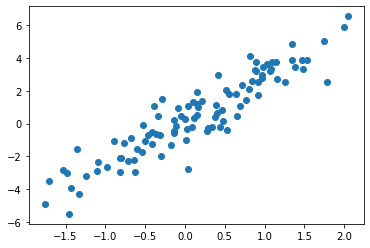

In [16]:
plt.scatter(x,y)

In [17]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
inputs = Variable(x)
outputs = Variable(y)

In [18]:
class reg(nn.Module):
    def __init__(self):
        super(reg,self).__init__()
        self.liner = nn.Linear(1,1)
    def forward(self,x):
        out = self.liner(x)
        return out
    

In [19]:
# define the model
model = reg()
# define a loss function
loss = nn.MSELoss()
# define a optimizer
optimizer = optim.SGD(model.parameters(),lr=0.001)



In [20]:
for i in range(1001):
    out = model(inputs)
    # calculate loss
    loss_mse = loss(out,outputs)
    # zero gradiant
    optimizer.zero_grad()
    # calculate gradiant
    loss_mse.backward()
    #change parameters
    optimizer.step()
    if i%100 == 0:
        print(i,loss_mse.item())

0 4.330234527587891
100 3.2645797729492188
200 2.5355401039123535
300 2.0344765186309814
400 1.688460111618042
500 1.4483531713485718
600 1.2809215784072876
700 1.1635953187942505
800 1.080981969833374
900 1.022534728050232
1000 0.9809926748275757


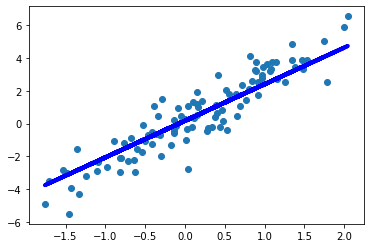

In [21]:
pre = model(inputs)
plt.scatter(x,y)
plt.plot(x,pre.data.numpy(),'b-',lw=4)

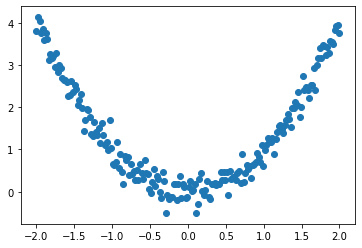

In [22]:
# non-linear model
x = np.linspace(-2,2,200)[:,np.newaxis]
noise = np.random.normal(0,0.2,x.shape)
y = np.square(x) + noise
plt.scatter(x,y)

In [23]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
inputs = Variable(x)
outputs = Variable(y)

In [27]:
class non_linear(nn.Module):
    def __init__(self):
        super(non_linear,self).__init__()
        self.liner = nn.Linear(1,10)
        self.tanh = nn.Tanh()
        self.fc = nn.Linear(10,1)
    def forward(self,x):
        x = self.liner(x)
        x = self.tanh(x)
        x = self.fc(x)
        return x
    

In [28]:
# define the model
model = non_linear()
# define a loss function
loss = nn.MSELoss()
# define a optimizer
optimizer = optim.SGD(model.parameters(),lr=0.3)

for name, param in model.named_parameters():
    print('name: {}  params: {}'.format(name,param))


name: liner.weight  params: Parameter containing:
tensor([[ 0.4973],
        [-0.2745],
        [-0.3184],
        [-0.9591],
        [ 0.8463],
        [-0.0142],
        [ 0.2715],
        [-0.3860],
        [ 0.8808],
        [-0.8235]], requires_grad=True)
name: liner.bias  params: Parameter containing:
tensor([ 0.0643,  0.7315,  0.1240, -0.5497, -0.1386,  0.2439,  0.3012,  0.6399,
         0.6905,  0.6223], requires_grad=True)
name: fc.weight  params: Parameter containing:
tensor([[ 0.0876,  0.2574,  0.2737, -0.1211, -0.2678, -0.2512,  0.2559,  0.3003,
         -0.2886, -0.0468]], requires_grad=True)
name: fc.bias  params: Parameter containing:
tensor([0.1014], requires_grad=True)


In [29]:
for i in range(2001):
    out = model(inputs)
    # calculate loss
    loss_mse = loss(out,outputs)
    # zero gradiant
    optimizer.zero_grad()
    # calculate gradiant
    loss_mse.backward()
    #change parameters
    optimizer.step()
    if i%200 == 0:
        print(i,loss_mse.item())

0 2.587009906768799
200 0.17043651640415192
400 0.07070612162351608
600 0.06568130850791931
800 0.06474482268095016
1000 0.062451206147670746
1200 0.060930781066417694
1400 0.06012275069952011
1600 0.059657126665115356
1800 0.059349752962589264
2000 0.05912090465426445


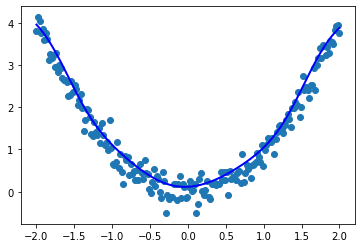

In [31]:
predict = model(inputs)
plt.scatter(x,y)
plt.plot(x,predict.data.numpy(),'b-',lw=2)

   <b>MINST dataset,cross entropy, optimizer, overfitting, dropout, and normalization

In [2]:
train_data = datasets.MNIST(root='./',train=True,transform=transforms.ToTensor(),download=True)
test_data = datasets.MNIST(root='./',train=False,transform=transforms.ToTensor(),download=True)

In [3]:
batch_size = 64

#data loader
train_loader = DataLoader(dataset=train_data,
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_data,
                         batch_size=batch_size,
                         shuffle=True)

In [4]:
for i, data in enumerate(train_loader):
    inputs,label = data
    print(inputs.shape)
    print(label.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [5]:
# define the network
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(28*28,500),
                                   nn.Dropout(p=0),
                                   nn.ReLU())
        self.layer2 = nn.Sequential(nn.Linear(500,300),
                                   nn.Dropout(p=0),
                                   nn.ReLU())
        self.layer3 = nn.Sequential(nn.Linear(300,10),
                                   nn.Softmax(dim=1))

    def forward(self,x):
        #change data to two dims (has to be two dims)
        x = x.view(x.size(0),-1)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x
    

In [6]:
#define the model
model = Net()
#define loss
mse_loss = nn.CrossEntropyLoss() # when use CrossEntroy loss we do not need to one hot encoding
#define optimizer
optimizer = optim.Adam(model.parameters(),lr=0.001,weight_decay=0.001) # weight_decay is a normalization function
# the bigger the weight_decay, the lower chance of overfitting. normalization is used for solve overfitting problem

In [7]:
# define a training function
def train():
    #change to model to train to ensure Dropout is working 
    model.train()
    for i, data in enumerate(train_loader):
        inputs,labels = data
        # get the output of model
        out = model(inputs)
        loss = mse_loss(out,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [8]:
# define a test function:
def test():
    # change the model to evaluate to ensure Dropout is not working (dropout is not used in evaluation)
    model.eval()
    correct = 0
    for i, data in enumerate(test_loader):
        inputs,labels= data
        out = model(inputs)
        # get the max value and its index
        _,predict = torch.max(out,1)
        
        correct += (predict == labels).sum()
        
    print('Test rate: {:.4f}'.format(correct.item()/len(test_data)))
    correct1 = 0 
    for i, data in enumerate(train_loader):
        inputs,labels= data
        out = model(inputs)
        # get the max value and its index
        _,predict = torch.max(out,1)
        
        correct1 += (predict == labels).sum()
        
    print('Train rate: {:.4f}'.format(correct1.item()/len(train_data)))

In [ ]:
for i in range(20):
    print('Epoch: {}'.format(i+1))
    train()
    test()

Epoch: 1
Test rate: 0.9435
Train rate: 0.9409
Epoch: 2
Test rate: 0.9509
Train rate: 0.9515
Epoch: 3
Test rate: 0.9565
Train rate: 0.9590
Epoch: 4
Test rate: 0.9630
Train rate: 0.9647
Epoch: 5
Test rate: 0.9650
Train rate: 0.9674
Epoch: 6
Test rate: 0.9647
Train rate: 0.9670
Epoch: 7


<b>Optimizer

In [77]:
#SGDM
# optimizer = optim.SGD(model.parameters(),lr=0.5,weight_decay=0.001,momentum=0.4)

#SGD
# optimizer = optim.SGD(model.parameters(),lr=0.5,weight_decay=0.001)

#Adam
# optimizer = optim.Adam(model.parameters(),lr=0.001,weight_decay=0.001)

<b>Conv2D, maxPooling2D

In [11]:
# Conv2D, maxPooling2D
train_data = datasets.MNIST(root='./',train=True,transform=transforms.ToTensor(),download=True)
test_data = datasets.MNIST(root='./',train=False,transform=transforms.ToTensor(),download=True)

batch_size = 64

#data loader
train_loader = DataLoader(dataset=train_data,
                         batch_size=batch_size,
                         shuffle=True)
test_loader = DataLoader(dataset=test_data,
                         batch_size=batch_size,
                         shuffle=True)

# define the network
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1,32,5,1,2), 
                                   # in_channels is the color of image, for gray image is 1, color is 3
                                   # out_chennels is number of samle image to produce
                                   # kernal_size = 5
                                   # stride = 1 
                                   # padding = 3x3 kernel size use 1, 5x5 kernal size use 2, 7x7 kernal size use 3
                                   nn.ReLU(),
                                   nn.MaxPool2d(2,2))
                                   # kernal_size = 2
                                   # stride = 2 

        self.conv2 = nn.Sequential(nn.Conv2d(32,64,5,1,2),
                                   nn.ReLU(),
                                   nn.MaxPool2d(2,2))
        self.fc1 = nn.Sequential(nn.Linear(64*7*7,500), 
                                 # 64 is upper layer samle images, 28 - 14 - 7 (during the conv padding process)
                                   nn.ReLU(),
                                   nn.Dropout(p=0.5))
        self.fc2 = nn.Sequential(nn.Linear(500,10),
                                   nn.Softmax(dim=1))

    def forward(self,x):
        # conv layers must be 4d to calculate [64,1,28,28]
        x = self.conv1(x)
        x = self.conv2(x)

        # fully connected layer must be 2d to calculate
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
#define the model
model = Net()
#define loss
mse_loss = nn.CrossEntropyLoss() # when use CrossEntroy loss we do not need to one hot encoding
#define optimizer
optimizer = optim.Adam(model.parameters(),lr=0.001,weight_decay=0.0001) # weight_decay is a normalization function
# the bigger the weight_decay, the lower chance of overfitting. normalization is used for solve overfitting problem

# define a training function
def train():
    #change to model to train to ensure Dropout is working 
    model.train()
    for i, data in enumerate(train_loader):
        inputs,labels = data
        # get the output of model
        out = model(inputs)
        loss = mse_loss(out,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
# define a test function:
def test():
    # change the model to evaluate to ensure Dropout is not working (dropout is not used in evaluation)
    model.eval()
    correct = 0
    for i, data in enumerate(test_loader):
        inputs,labels= data
        out = model(inputs)
        # get the max value and its index
        _,predict = torch.max(out,1)
        
        correct += (predict == labels).sum()
        
    print('Test rate: {:.4f}'.format(correct.item()/len(test_data)))
    correct1 = 0 
    for i, data in enumerate(train_loader):
        inputs,labels= data
        out = model(inputs)
        # get the max value and its index
        _,predict = torch.max(out,1)
        
        correct1 += (predict == labels).sum()
        
    print('Train rate: {:.4f}'.format(correct1.item()/len(train_data)))
    
for i in range(20):
    print('Epoch: {}'.format(i+1))
    train()
    test()

Epoch: 1
Test rate: 0.9774
Train rate: 0.9754
Epoch: 2
Test rate: 0.9858
Train rate: 0.9874
Epoch: 3
Test rate: 0.9891
Train rate: 0.9886
Epoch: 4
Test rate: 0.9873
Train rate: 0.9880
Epoch: 5
Test rate: 0.9902
Train rate: 0.9904
Epoch: 6
Test rate: 0.9905
Train rate: 0.9917
Epoch: 7
Test rate: 0.9910
Train rate: 0.9917
Epoch: 8
Test rate: 0.9899
Train rate: 0.9908
Epoch: 9
Test rate: 0.9916
Train rate: 0.9934
Epoch: 10
Test rate: 0.9911
Train rate: 0.9920
Epoch: 11
Test rate: 0.9914
Train rate: 0.9925
Epoch: 12
Test rate: 0.9919
Train rate: 0.9924
Epoch: 13
Test rate: 0.9904
Train rate: 0.9928
Epoch: 14
Test rate: 0.9910
Train rate: 0.9927
Epoch: 15
Test rate: 0.9908
Train rate: 0.9932
Epoch: 16
Test rate: 0.9905
Train rate: 0.9933
Epoch: 17
Test rate: 0.9914
Train rate: 0.9939
Epoch: 18
Test rate: 0.9920
Train rate: 0.9949
Epoch: 19
Test rate: 0.9918
Train rate: 0.9945
Epoch: 20
Test rate: 0.9918
Train rate: 0.9936
